# Classification with K-nn and Decision Trees

## Exploring E.coli Dataset


The dataset describes the problem of classifying [E.coli proteins](https://en.wikipedia.org/wiki/Escherichia_coli) using their amino acid sequences in their cell localization sites. That is, predicting how a protein will bind to a cell based on the chemical composition of the protein before it is folded.

The dataset is credited to Kenta Nakai and was developed into its current form by **Paul Horton** and **Kenta Nakai** in their 1996 paper titled ["*A Probabilistic Classification System For Predicting The Cellular Localization Sites Of Proteins.*"](https://pubmed.ncbi.nlm.nih.gov/8877510/) In it, they achieved a classification accuracy of 81 percent.

The dataset is comprised of 336 examples of E.coli proteins and each example is described using seven input variables calculated from the proteins amino acid sequence.

<p>
    <img src="https://i.la-croix.com/1400x933/smart/2022/03/31/1201207976/bacterie-Escherichia-reside-digestif-lhomme-animaux-chaud_0.jpg" width=500>
</p>


### Attribute Information

1. *mcg*: McGeoch's method for signal sequence recognition.
2. *gvh*: von Heijne's method for signal sequence recognition.
3. *lip*: von Heijne's Signal Peptidase II consensus sequence score.
4. *chg*: Presence of charge on N-terminus of predicted lipoproteins.
5. *aac*: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. *alm1*: score of the ALOM membrane spanning region prediction program.
7. *alm2*: score of ALOM program after excluding putative cleavable signal regions from the sequence.

### Class Distribution.

There are eight classes described as follows:

- **cp**  (cytoplasm)                                  
- **im**  (inner membrane without signal sequence)                  
- **pp**  (perisplasm)                                  
- **imU** (inner membrane, uncleavable signal sequence) 
- **om**  (outer membrane)                               
- **omL** (outer membrane lipoprotein)                   
- **imL** (inner membrane lipoprotein)                   
- **imS** (inner membrane, cleavable signal sequence)    



## TODO : 

- Data preprocessing
    - [x] Balancing
    - [X] PCA (**Needless**)
- Analysis
    - [x] Describe dataset
    - [x] histograms
    - [x] boxplot
    - [x] correlation matrix
    - [ ] Comment results
- Classification
    - [X] KNN
    - [ ] Comment Results
    - [ ] Decision Tree
    - [ ] Comment Rsults
    - [ ] Each classification should implement the 3 methods 

In [1]:
# Loading the dataset
import pandas as pd

names = ["Sequence Name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "location"]
ecoli = pd.read_csv("data/ecoli.data",names=names)
ecoli.drop(["Sequence Name"], axis=1, inplace = True) # drop sequence name as it does not contain generalizable information for modeling

# drop ...
ecoli.drop(ecoli[(ecoli["location"]=="om") | (ecoli["location"]=="omL") | (ecoli["location"]=="imL") | (ecoli["location"]=="imS") ].index, axis=0, inplace= True)
ecoli.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,location
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [2]:
# Dataset description
ecoli.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,307.000000,307.000000,307.000000,307.0,307.000000,307.000000,307.000000
mean,0.482573,0.486254,0.483388,0.5,0.483844,0.499739,0.515993
std,0.193564,0.141366,0.041902,0.0,0.107789,0.223112,0.206084
min,0.000000,0.160000,0.480000,0.5,0.000000,0.030000,0.000000
25%,0.335000,0.390000,0.480000,0.5,0.420000,0.320000,0.360000
50%,0.470000,0.460000,0.480000,0.5,0.480000,0.450000,0.440000
75%,0.640000,0.550000,0.480000,0.5,0.560000,0.715000,0.730000
max,0.890000,1.000000,1.000000,0.5,0.750000,1.000000,0.990000


In [3]:
# Infos
ecoli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 335
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mcg       307 non-null    float64
 1   gvh       307 non-null    float64
 2   lip       307 non-null    float64
 3   chg       307 non-null    float64
 4   aac       307 non-null    float64
 5   alm1      307 non-null    float64
 6   alm2      307 non-null    float64
 7   location  307 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.6+ KB


In [4]:
ecoli.loc[ecoli["location"] == "pp"].head()

,mcg,gvh,lip,chg,aac,alm1,alm2,location
284,0.74,0.49,0.48,0.5,0.42,0.54,0.36,pp
285,0.70,0.61,0.48,0.5,0.56,0.52,0.43,pp
286,0.66,0.86,0.48,0.5,0.34,0.41,0.36,pp
287,0.73,0.78,0.48,0.5,0.58,0.51,0.31,pp
288,0.65,0.57,0.48,0.5,0.47,0.47,0.51,pp


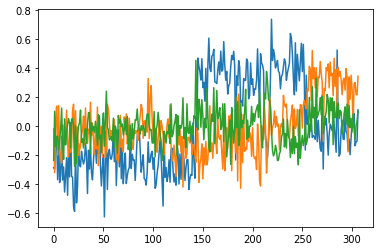

In [5]:
import matplotlib.pyplot as plt

# Principal component Analysis
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
X= ecoli.drop(["location"], axis=1)
pca.fit(X)
X = pca.transform(X)
df = pd.DataFrame(data = X , columns=["pc1","pc2", "pc3"])
plt.plot(X);

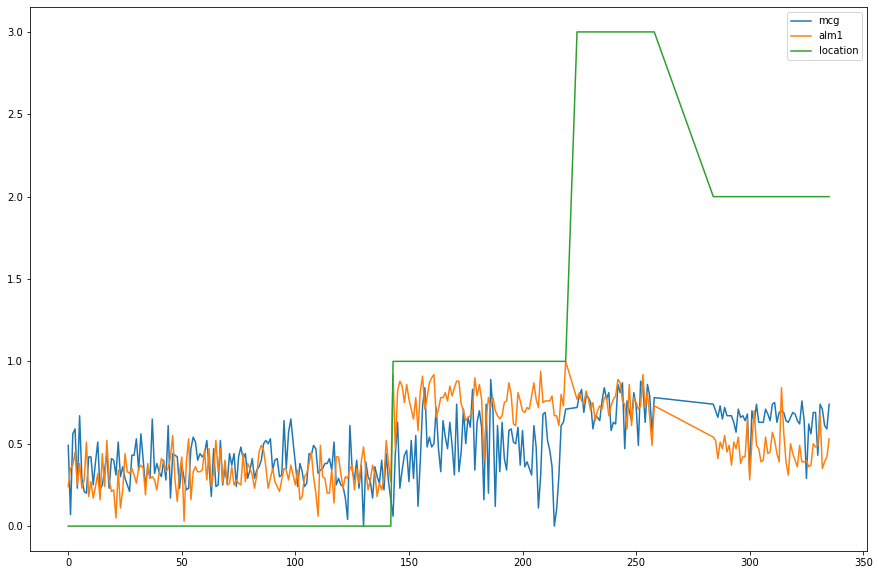

In [6]:
import matplotlib.pyplot as plt

# replace categorical data into quantitative (encoding)
## (location varies when alm1 varies)
cleanup_nums = {"location": {"cp": 0, "im": 1,  "pp": 2 , "imU": 3}}
ecoli = ecoli.replace(cleanup_nums)
ecoli["mcg"].plot(figsize=(15,10))
ecoli["alm1"].plot()
ecoli["location"].plot()
plt.legend() 
plt.show()

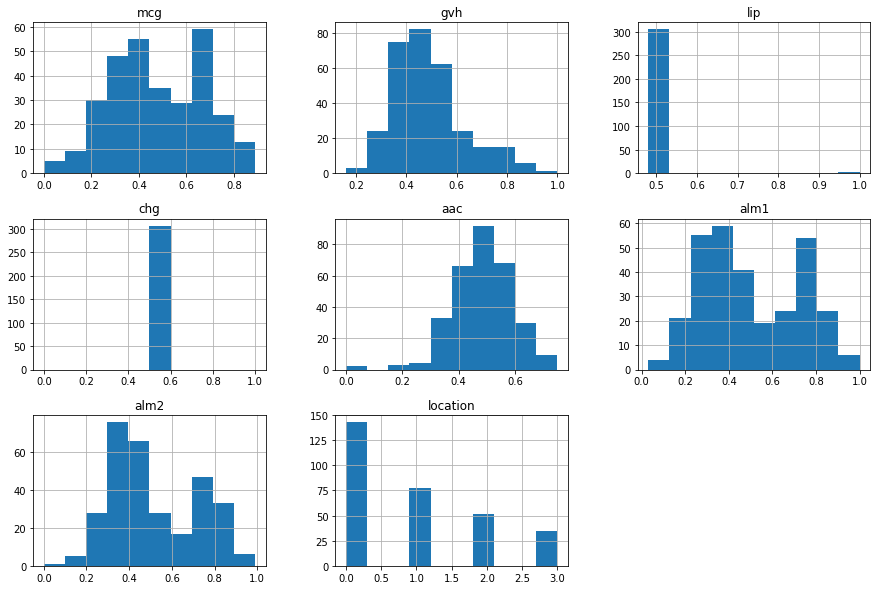

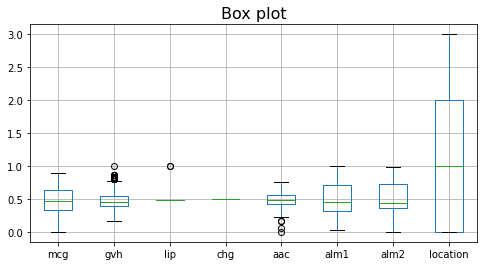

In [7]:
# histograms
ecoli.hist(figsize=(15,10))
plt.show()

# boxplot
## gvh & aac contains outliers
## chg and lip to drop
ecoli.boxplot(figsize=(8,4))
plt.title("Box plot", fontsize=16) # show the distribution of the data through displaying the data quartiles and median.
plt.show()

               mcg       gvh       lip  chg       aac      alm1      alm2  \
mcg       1.000000  0.426357  0.026159  NaN  0.123890  0.416450  0.278154   
gvh       0.426357  1.000000  0.039444  NaN -0.130241  0.205898 -0.033765   
lip       0.026159  0.039444  1.000000  NaN  0.049782  0.087344  0.099971   
chg            NaN       NaN       NaN  NaN       NaN       NaN       NaN   
aac       0.123890 -0.130241  0.049782  NaN  1.000000  0.348308  0.470245   
alm1      0.416450  0.205898  0.087344  NaN  0.348308  1.000000  0.853031   
alm2      0.278154 -0.033765  0.099971  NaN  0.470245  0.853031  1.000000   
location  0.693299  0.445737  0.083000  NaN  0.203291  0.592088  0.397109   

          location  
mcg       0.693299  
gvh       0.445737  
lip       0.083000  
chg            NaN  
aac       0.203291  
alm1      0.592088  
alm2      0.397109  
location  1.000000  


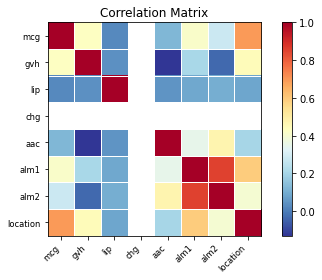

In [8]:
#correlation matirx
## Corellation between (mcg, location) (alm1, location) (alm1, alm2)
corr = ecoli.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

### Comment
Corellation between (mcg, location) (alm1, location) (alm1, alm2)

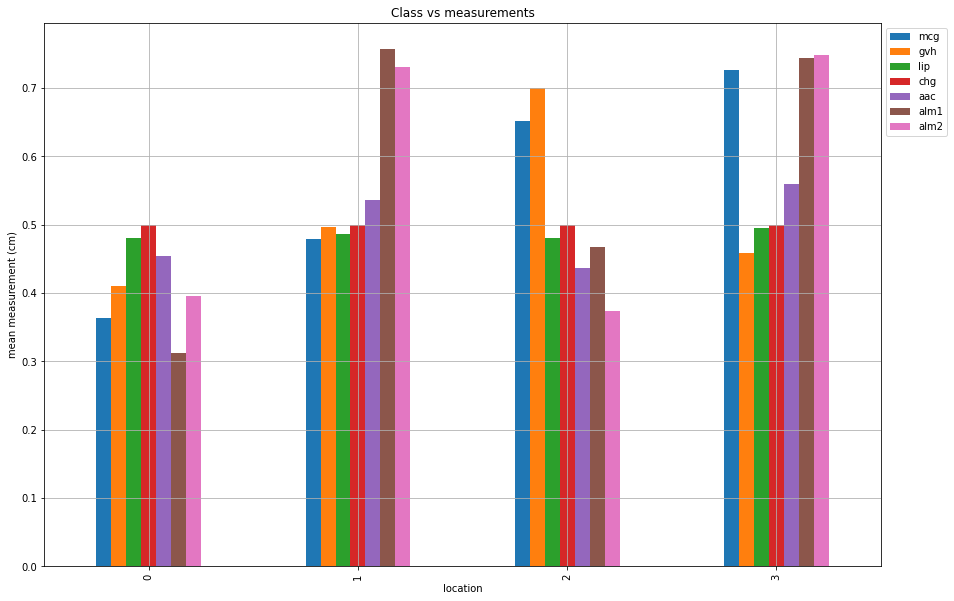

In [9]:
ecoli.groupby(by = "location").mean()
ecoli.groupby(by="location").mean().plot(kind="bar", figsize=(15,10))
plt.title('Class vs measurements')
plt.ylabel('mean measurement (cm)')
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 
plt.show()

In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
X= ecoli.drop(["location"], axis=1) # features
y= ecoli["location"] # target
model = KNeighborsClassifier(n_neighbors=1)
# Train the model using the training sets
model.fit(X,y)
# Predict Output
y_model = model.predict(X)
accuracy_score(y,y_model) 

NameError: name 'ecoli' is not defined

## KNN Validation 

In [12]:
import numpy as np
# Hold out
X= ecoli.drop(["location"], axis=1)
y= ecoli["location"]
model2 = KNeighborsClassifier(n_neighbors=5)
X1, X2, y1, y2 = train_test_split(X,y, random_state= np.random, train_size=0.7)
y_pred=model.fit(X1,y1).predict(X2)
y2_model=model.predict(X2)
print(accuracy_score(y2,y2_model))
# Exécutez ce code plusieurs fois, est ce que vous obtenez le même résultat ? pourquoi?
## -> Train1 # Train2

0.7956989247311828


In [13]:
# Cross-validation
#2 fold
X1, X2, y1, y2 = train_test_split(X,y, random_state= 0, train_size=0.5)
y2_model = model.fit(X1,y1).predict(X2)
y1_model = model.fit(X2,y2).predict(X1)
accuracy_score(y1,y1_model), accuracy_score(y2, y2_model) 

(0.869281045751634, 0.7987012987012987)

In [14]:
#5 fold
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5) 

array([0.90322581, 0.90322581, 0.70491803, 0.81967213, 0.75409836])

In [15]:
#lOOCV 
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv =LeaveOneOut() )
scores.mean() 
print(scores)
print(scores.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.]
0.8273615635179153


In [16]:
# Model evaluation
X1, X2, y1, y2 = train_test_split(X,y, random_state= np.random, train_size=0.7)
y_pred=model2.fit(X1,y1).predict(X2)
y2_model=model2.predict(X2)
cm1= confusion_matrix(y2, y2_model)
print("Confusion Matrix: \n", cm1)
print(accuracy_score(y2, y2_model))
print(precision_score(y2, y2_model, average='weighted'))
print(recall_score(y2, y2_model, average='macro'))
print("Accuracy:", accuracy_score(y2, y2_model))
print("Confusion matrix:", confusion_matrix(y2, y2_model))
print("Classification report :", classification_report(y2, y2_model)) 

Confusion Matrix: 
 [[41  0  1  0]
 [ 0 18  1  3]
 [ 1  0 12  0]
 [ 0  8  0  8]]
0.8494623655913979
0.849569785053656
0.8043623043623044
Accuracy: 0.8494623655913979
Confusion matrix: [[41  0  1  0]
 [ 0 18  1  3]
 [ 1  0 12  0]
 [ 0  8  0  8]]
Classification report :               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.69      0.82      0.75        22
           2       0.86      0.92      0.89        13
           3       0.73      0.50      0.59        16

    accuracy                           0.85        93
   macro avg       0.81      0.80      0.80        93
weighted avg       0.85      0.85      0.84        93



In [17]:
# Optimal parameters: Grid Search
# Grid search
from sklearn.model_selection import GridSearchCV
#creat a new KNN model
Knn2 = KNeighborsClassifier()
K_range = list(range(1,31))
pram_grid = dict(n_neighbors = K_range)
grid = GridSearchCV(Knn2, pram_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8726881720430107
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


## Decision Tree

In [18]:
# Importing Required Libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [19]:
# Loading data
ecoli

,mcg,gvh,lip,chg,aac,alm1,alm2,location
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,2
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,2
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,2
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,2


### Feature selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).


In [20]:
# split dataset in features and target variable
feature_cols = ["mcg", "gvh", "lip", "chg" , "aac", "alm1", "alm2"]
X= ecoli.drop(["location"], axis=1) # Features
y= ecoli["location"] # Target variable

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [23]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8709677419354839


### Visualizing Decision Trees

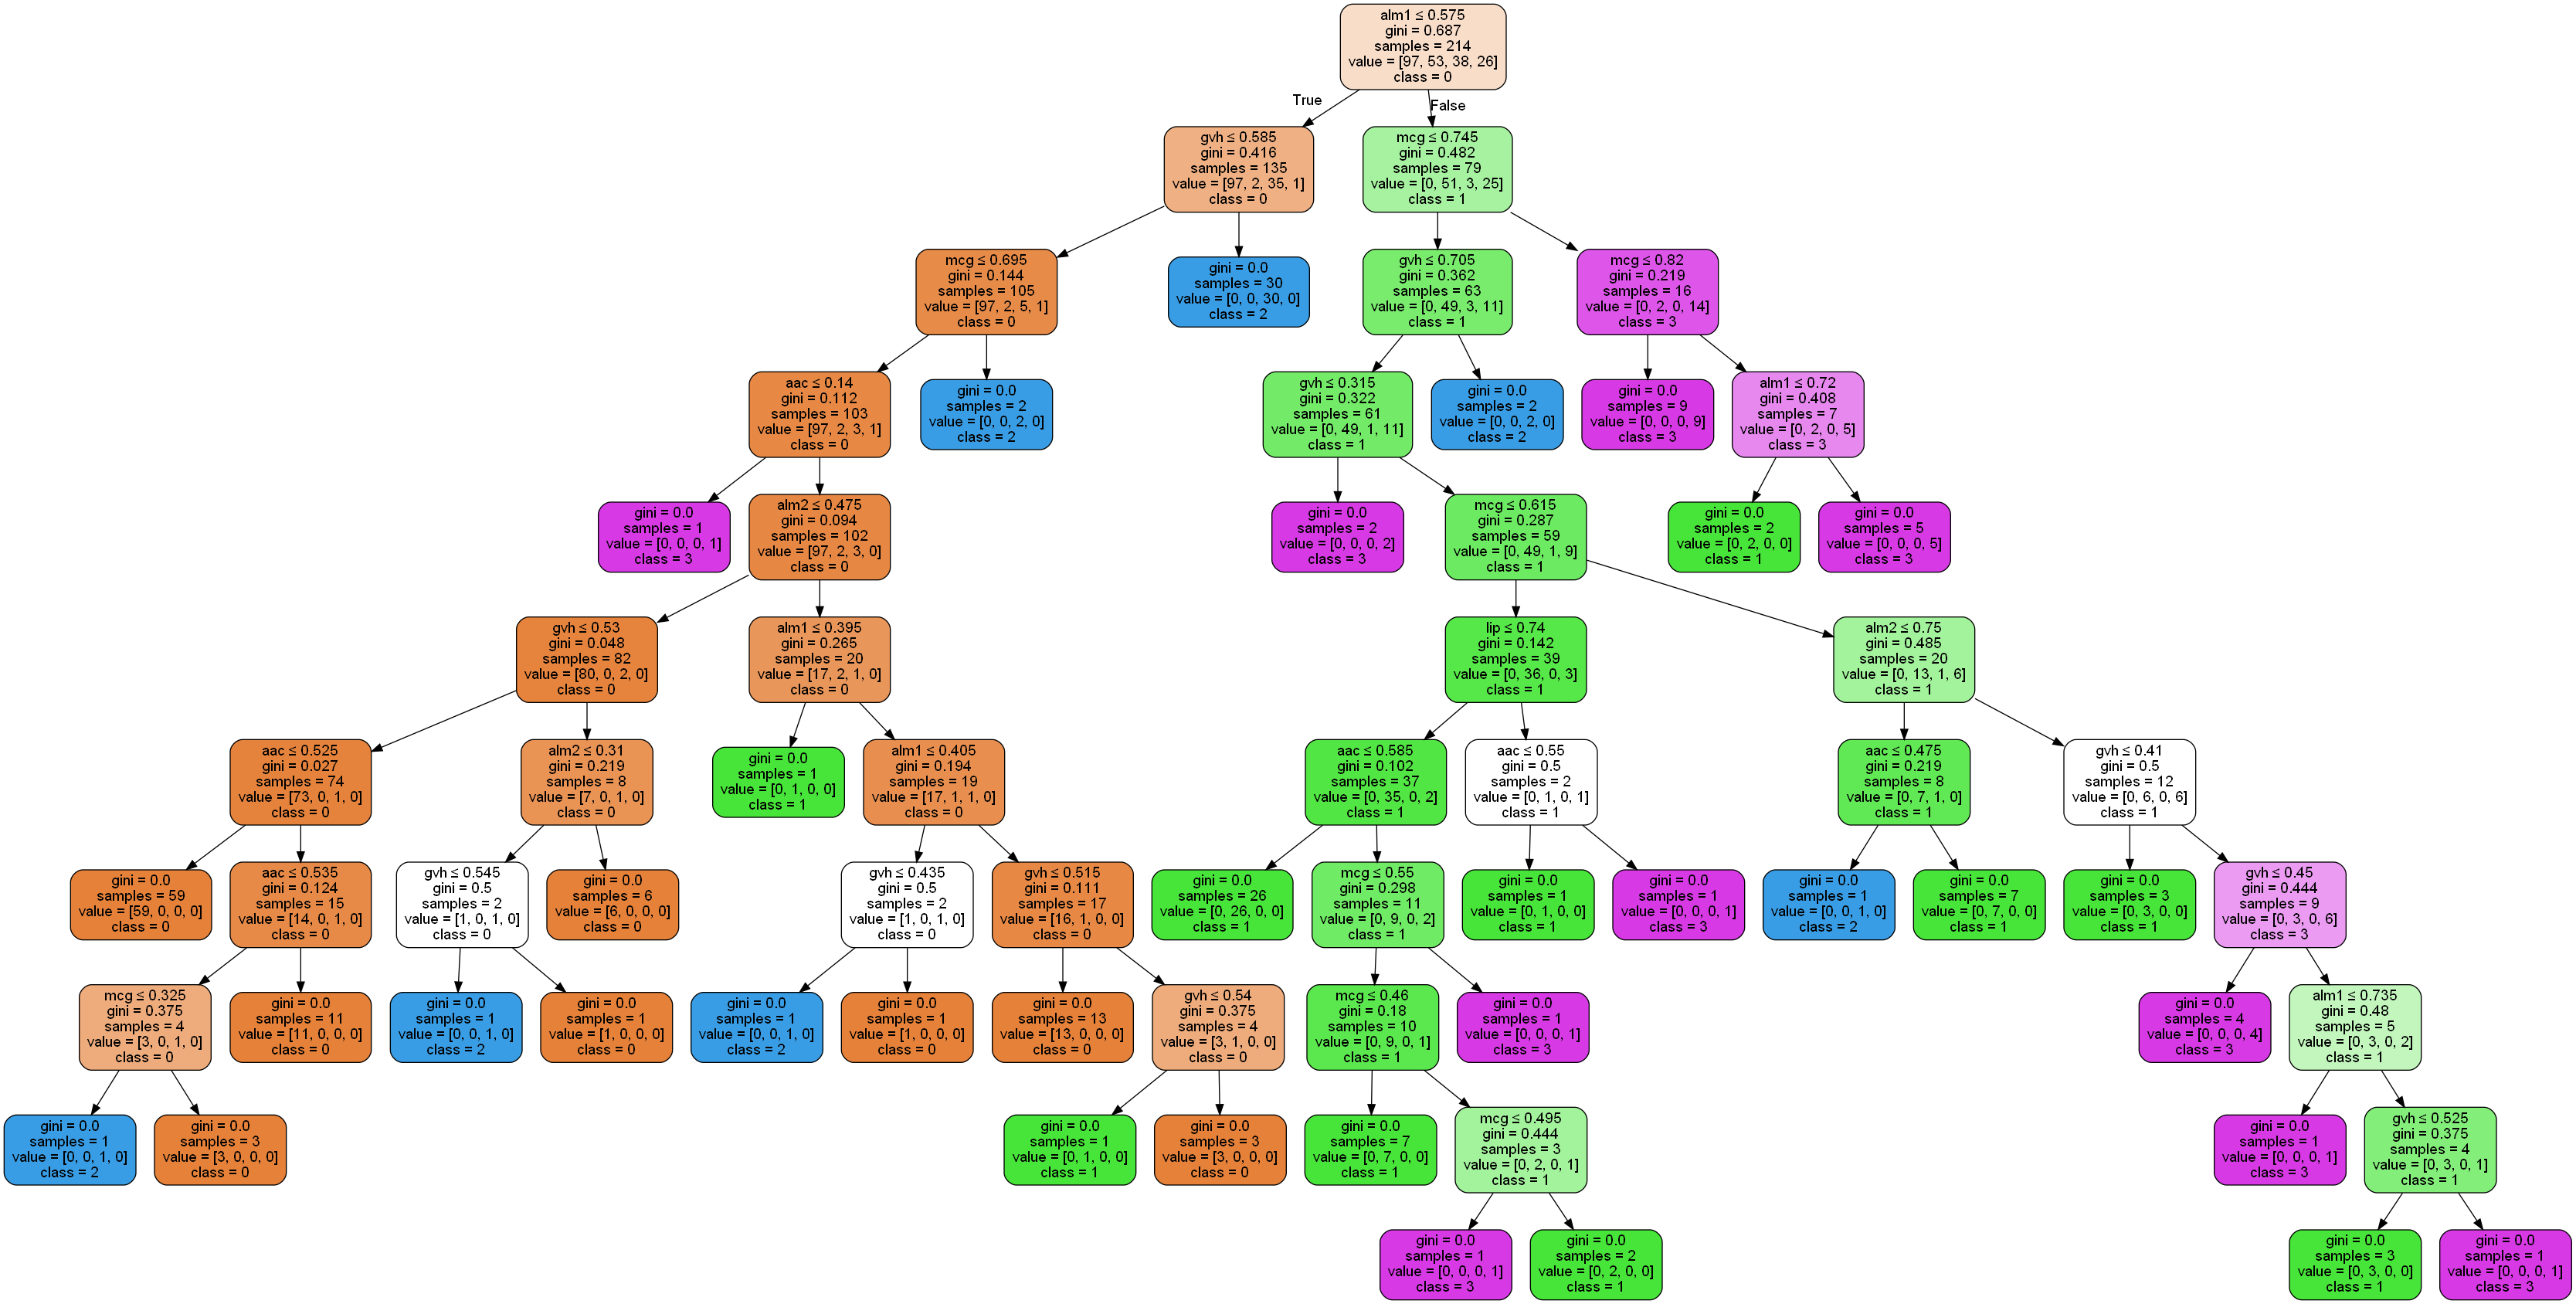

In [25]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ecoli.png')
Image(graph.create_png())

### Optimizing Decision Tree Performance 

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9139784946236559


### Visualizing Decision Trees

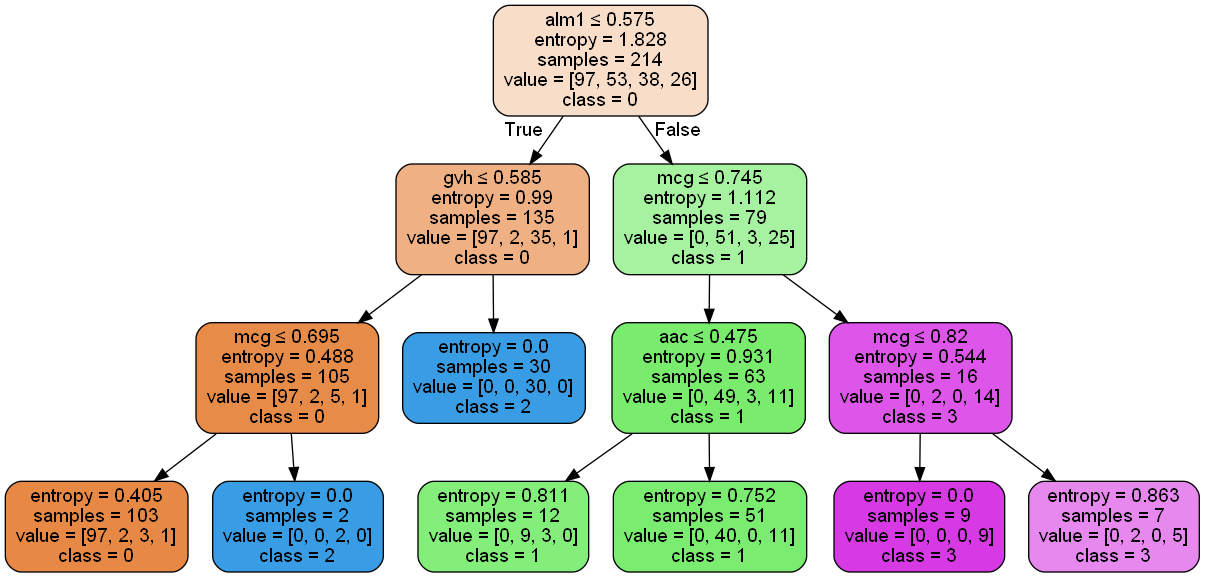

In [31]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

### - Decision Tree resource [Here](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)
### - KNN resource [Here](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn) 